SENTIMENT ANALYSIS 1.1 FOR MONEY LAUNDERING 

In [1]:
#Import to visualize the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
#Read file
df = pd.read_excel('nstMLSentAnalysis1.1.xlsx')

In [3]:
#Display dataframe
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword,clean_text,sentiment_textblob,sentiment_vader,word_count,state_name,location_type,names,names_revised,loc_type_counter
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...,statement party said practice used tarnish peo...,0.093889,0.9774,1,KUALA LUMPUR,local,"['Syed Saddiq', 'Syed Abdul Rahman', 'Syed Sad...","['Syed Saddiq', 'Syed Abdul Rahman', 'Muda', '...",1
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...,deputy public prosecutor noralis mat rasyidah ...,-0.053205,-0.9079,3,KUALA LUMPUR,local,"['Noralis Mat', 'Azura Alwi', 'Azlan', 'Menter...","['Noralis Mat', 'Azura Alwi', 'Menteri Besar',...",1
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...,sentenced seven years jail received two stroke...,0.046667,-0.6461,1,KUALA LUMPUR,local,"['Muda', 'Datuk Seri', 'Anwar Ibrahim', ""Lee Z...","['Muda', 'Datuk Seri', 'Anwar Ibrahim', ""Lee Z...",1
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...,said threats offer bribes happened affected pa...,0.061270,0.8957,1,KUALA LUMPUR,local,"['Datuk Iskandar', 'Abdul Khalid', 'Kuala Kang...","['Datuk Iskandar', 'Abdul Khalid', 'Kuala Kang...",1
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...,sparked hope especially younger generation saw...,0.044567,0.9657,1,KUALA LUMPUR,local,"['Muda', 'Hassan', 'Syed Saddiq', 'Prabakaran ...","['Muda', 'Hassan', 'Syed Saddiq', 'Prabakaran ...",1


In [4]:
#Filter words from 'clean_text'

# Words to be removed
words_to_remove = ['said', 'also', 'would', 'us', 'told', 'new', 'could', 'found', 'due', 'court']

# Function to remove specified words
def remove_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in words_to_remove]
    return ' '.join(filtered_words)

# Apply the function to the 'text_column'
df['clean_text'] = df['clean_text'].apply(lambda x: remove_words(x))

# Display the updated DataFrame
print(df)



                                                  URL           Topics  \
0    https://www.nst.com.my/news/politics/2023/11/9...        Politics   
1    https://www.nst.com.my/news/crime-courts/2023/...  Crime & Courts   
2    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
3    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
4    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
..                                                 ...             ...   
995  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
996  https://www.nst.com.my/world/world/2019/10/533...           World   
997  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
998  https://www.nst.com.my/world/region/2019/10/53...          Region   
999  https://www.nst.com.my/world/world/2019/10/533...           World   

             Date Published  \
0     Nov 10, 2023 @ 1:46pm   
1    Nov 10, 2023 @ 11:38am   
2     Nov 10, 2023

In [ ]:
#Filter names from 'names_revised'

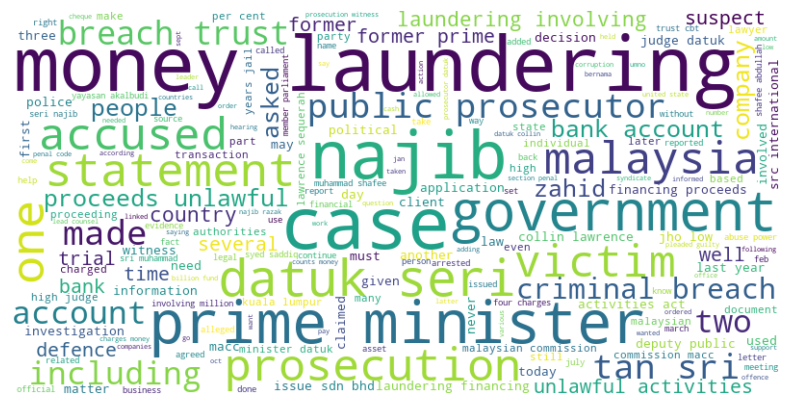

In [5]:
#Create WordCloud after filtered words
from wordcloud import WordCloud

#Step 1 combine text data into single string
text_data = ' '.join(df['clean_text'].astype(str))

#Step 2 generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

#Step 3 : Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
#Count word frequency for clean text
def count_word_frequency(sentence_column):
    # Combine all sentences into a single string
    all_text = ' '.join(sentence_column.astype(str))

    # Split the text into words
    words = all_text.split()

    # Create a DataFrame to store the word frequencies
    word_freq_df = pd.DataFrame({'Word': words})

    # Count the occurrences of each word
    word_counts = word_freq_df['Word'].value_counts().reset_index()

    # Rename the columns for clarity
    word_counts.columns = ['Word', 'Frequency']

    # Sort the DataFrame by word frequency in descending order (High to Low)
    sorted_word_counts = word_counts.sort_values(by='Frequency', ascending=False)

    return sorted_word_counts

wordFreq_df = count_word_frequency(df['clean_text'])

# Display the result
print(wordFreq_df)


             Word  Frequency
0           money       1682
1           najib       1342
2           datuk       1240
3         charges       1222
4      laundering       1186
...           ...        ...
11113       lover          1
11112   justifies          1
11111        ilmu          1
11110       janda          1
14983   zeebrugge          1

[14984 rows x 2 columns]


In [21]:
#Raw file of list names into Excel
wordFreq_df.to_excel('nstMLWordFreq.xlsx', index=False)

In [26]:
#Raw file of list names into csv
wordFreq_df.to_csv('nstMLWordFreq.csv', index=False)

In [ ]:
# Not Updated - pie chart to bar chart
#Create a pie chart based on the Topics
#Function to count words in column
def count_words(text):
    words = text.split()
    return len(words)

df['word_count'] = df['Topics'].apply(count_words)

#Group by topics and sum the word counts
topic_word_counts = df.groupby('Topics')['word_count'].sum().reset_index()

# Sort the DataFrame based on the word counts
topic_word_counts = topic_word_counts.sort_values(by = 'word_count', ascending=False)

# Drop intermediate 'word_count' column if needed
df = df.drop(columns=['word_count'])


#Plot the pie chart - display all topics & percentage
plt.figure(figsize=(8, 8))
plt.pie(topic_word_counts['word_count'], labels=topic_word_counts['Topics'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart based on the Topics')
plt.legend(labels=topic_word_counts['Topics'], loc='best')
plt.axis('equal')
plt.show()


In [8]:
#Count topics
df.Topics.value_counts()

Topics
Crime & Courts    640
Nation            143
World              69
Politics           32
Letters            25
Columnists         23
Business           20
Region             18
Leader              7
Groove              6
Football            5
Corporate           4
Property            4
Exclusive           2
Economy             1
Sunday Vibes        1
Name: count, dtype: int64

Data Extraction for Name Entity

In [6]:
#Data Extraction for name entity
pattern = r'(\b[A-Z][a-z]*\b)'

# Extract words that start with a capital letter from the 'Long-text' column
df['extracted_NE'] = df['Long-text'].str.extractall(pattern).groupby(level=0).agg(lambda x: ' '.join(x))

In [6]:
#New Changes Here
#Filter stopwords for column 'extracted_NE'
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the English stopwords
stop_words = set(stopwords.words('english'))

# Function to filter stopwords
def filter_stopwords(text):
    # Tokenize the text
    words = text.split()
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the function to the DataFrame column
df['extracted_NE'] = df['extracted_NE'].apply(filter_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#check data types
df.dtypes

URL                    object
Topics                 object
Date Published         object
News Title             object
Description            object
Long-text              object
Keyword                object
clean_text             object
sentiment_textblob    float64
sentiment_vader       float64
word_count              int64
state_name             object
location_type          object
names                  object
names_revised          object
loc_type_counter        int64
extracted_NE           object
dtype: object

In [ ]:
#remove all symbols such as [ ] and commas and '' in each row on specific column in dataframe 

# Define a function to clean the symbols
def clean_symbols(text):
    # Replace specific symbols with an empty string
    cleaned_text = text.replace('[', '').replace(']', '').replace(',', '').replace("''", '')
    return cleaned_text

# Apply the function to the desired column
df['cleaned_NR'] = df['names_revised'].apply(clean_symbols)

#remove the quotation symbol in excel using FindReplace

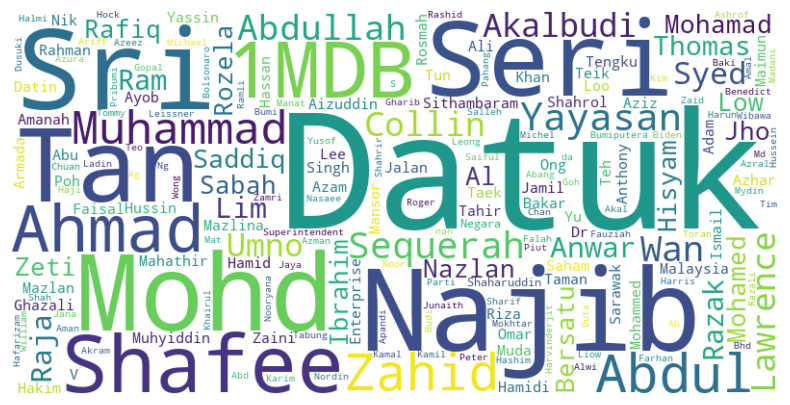

In [41]:
#Create a wordcloud based on person's name in each row in a dataframe column

from wordcloud import WordCloud

#Step 1 combine text data into single string
text_dataCleanedNR = ' '.join(df['cleaned_NR'].astype(str))

#Step 2 generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text_dataCleanedNR)

#Step 3 : Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
#find words inside a single quotation & double quotation & count the word frequency in a column dataframe and save into new dataframe that display the word & frequency in natural numbers
import re
# Function to extract words within single quotation or double quotations
def extract_quoted_words(text):
    # Using regular expression to find words within single and double quotes
    words = re.findall(r'\b\w+\b', text)
    return words

# Applying the function to the 'text_column' and creating a new column 'extracted_words'
df['extracted_wordsNR'] = df['names_revised'].apply(extract_quoted_words)

# Flattening the list of words and creating a new dataframe for word frequency
word_frequency_NR_df = pd.DataFrame(df['extracted_wordsNR'].explode().value_counts()).reset_index()

# Renaming columns for clarity
word_frequency_NR_df.columns = ['Name', 'Frequency']

# Drop unnecessary rows
# Specify the indices of rows you want to delete
rows_to_delete = [13]

# Delete the specified rows
word_frequency_NR_df = word_frequency_NR_df.drop(rows_to_delete)

# Reset the index
word_frequency_NR_df = word_frequency_NR_df.reset_index(drop=True)

# Displaying the resulting dataframe
print(word_frequency_NR_df)

           Name  Frequency
0         Datuk       1077
1         Najib        455
2           Sri        435
3          Mohd        396
4          Seri        376
...         ...        ...
2849      Firuz          1
2850     Kazakh          1
2851    Mindolo          1
2852  Alejandro          1
2853     Diokno          1

[2854 rows x 2 columns]


In [44]:
word_frequency_NR_df.head(10)

,Name,Frequency
0,Datuk,1077
1,Najib,455
2,Sri,435
3,Mohd,396
4,Seri,376
5,Tan,367
6,Shafee,366
7,1MDB,353
8,Ahmad,335
9,Abdul,301


In [50]:
word_frequency_NR_df.to_excel('word_freq_NR.xlsx', index=False)

In [13]:
#Clean extracted NR
#remove all symbols such as [ ] and commas in each row on column 'extracted_wordsNR' in dataframe 

df['extracted_wordsNR'] = df['extracted_wordsNR'].astype(str)  # Convert the column to string if it's not already

# Remove square brackets [] and commas
df['extracted_wordsNR'] = df['extracted_wordsNR'].str.replace('[\[\],]', '', regex=True)

# Now, df['your_column'] has symbols removed in each row

# Print the updated DataFrame
print(df)


                                                  URL           Topics  \
0    https://www.nst.com.my/news/politics/2023/11/9...        Politics   
1    https://www.nst.com.my/news/crime-courts/2023/...  Crime & Courts   
2    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
3    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
4    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
..                                                 ...             ...   
995  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
996  https://www.nst.com.my/world/world/2019/10/533...           World   
997  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
998  https://www.nst.com.my/world/region/2019/10/53...          Region   
999  https://www.nst.com.my/world/world/2019/10/533...           World   

             Date Published  \
0     Nov 10, 2023 @ 1:46pm   
1    Nov 10, 2023 @ 11:38am   
2     Nov 10, 2023

In [46]:
#Remove unnecessary column
df = df.drop(columns=['extracted_wordsNR', 'cleaned_NR', 'word_count','loc_type_counter'])

In [11]:
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword,clean_text,sentiment_textblob,sentiment_vader,word_count,state_name,location_type,names,names_revised,loc_type_counter,extracted_NE
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...,statement party practice used tarnish people r...,0.093889,0.9774,1,KUALA LUMPUR,local,"['Syed Saddiq', 'Syed Abdul Rahman', 'Syed Sad...","['Syed Saddiq', 'Syed Abdul Rahman', 'Muda', '...",1,A Syed Saddiq Syed Abdul Rahman This Muda Syed...
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...,deputy public prosecutor noralis mat rasyidah ...,-0.053205,-0.9079,3,KUALA LUMPUR,local,"['Noralis Mat', 'Azura Alwi', 'Azlan', 'Menter...","['Noralis Mat', 'Azura Alwi', 'Menteri Besar',...",1,Deputy Noralis Mat Rasyidah Azmi Kalai Attorne...
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...,sentenced seven years jail received two stroke...,0.046667,-0.6461,1,KUALA LUMPUR,local,"['Muda', 'Datuk Seri', 'Anwar Ibrahim', ""Lee Z...","['Muda', 'Datuk Seri', 'Anwar Ibrahim', ""Lee Z...",1,He The Muda Malaysian In Emphasising Prime Min...
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...,threats offer bribes happened affected parties...,0.061270,0.8957,1,KUALA LUMPUR,local,"['Datuk Iskandar', 'Abdul Khalid', 'Kuala Kang...","['Datuk Iskandar', 'Abdul Khalid', 'Kuala Kang...",1,He He Prime Minister Cabinet Members Parliamen...
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...,sparked hope especially younger generation saw...,0.044567,0.9657,1,KUALA LUMPUR,local,"['Muda', 'Hassan', 'Syed Saddiq', 'Prabakaran ...","['Muda', 'Hassan', 'Syed Saddiq', 'Prabakaran ...",1,He The The Muda Syed Saddiq Nusantara Academy ...


In [48]:
# Saved to excel
#Updated - filter word from column 'clean_text'
#Added - new column 'extracted_NE'
df.to_excel('nstMLSentAnalysis1.2.xlsx', index=False)